# Importando bibliotecas

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import solve_ivp
import matplotlib.pyplot as pl

# Importando dados

# Definindo condicoes iniciais

In [202]:
numero_de_femeas_infectadas = 25.
numero_de_femeas_saudaveis = 100.
numero_de_machos = 100.

condicoes_iniciais = [numero_de_femeas_infectadas, numero_de_femeas_saudaveis, numero_de_machos]

# Definindo modelo

In [203]:
def matriaquia(t, y):
    r = 100.
    alpha = 4
    k = 1000.

    dI = .8
    dN = .8
    dM = .8

    I = y[0]
    N = y[1]
    M = y[2]

    dIdt = r * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) / 2 * (1 - (I+N+M) / k) - dI * I
    dNdt = r * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * (1 - (I+N+M) / k) - dN * N
    dMdt = r * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) / 2 * 0.1 + r * ( (M*N) / (M+ (1/alpha)*(I+N) ) ) * (1- (I+N+M) / k) - dM*M

    return [dIdt, dNdt, dMdt]

# Chamando modelo

In [204]:
resultados = solve_ivp(matriaquia, [0,100], condicoes_iniciais, method='RK45', t_eval=np.arange(100))
resultados_modelo = resultados.y[0]


# Plotando gráficos

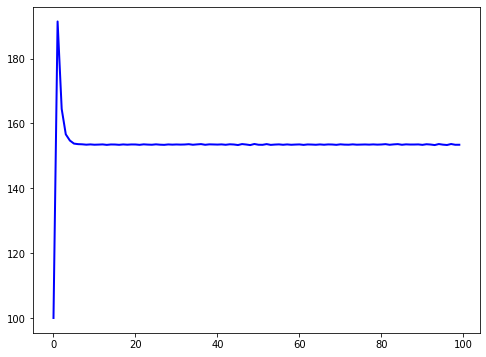

In [205]:
ts1=np.arange(100)
fig, ax = pl.subplots(figsize=(8,6))

ax.plot(ts1, resultados_modelo, color='b',zorder=1, linewidth=2)